### Importing the packages

In [2]:
import pandas as pd
import seaborn as numpy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import os
%matplotlib inline

### Importing the Dataset

In [3]:
iphone_data = pd.read_csv('C:/Users/Sowmya Ganesh/Documents/iphone_purchase_records.csv')
iphone_data

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


### Basic Information Check

In [4]:
iphone_data.shape

(400, 4)

In [5]:
iphone_data.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [6]:
iphone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


### PreProcessing

In [7]:
## converting Gender column to two columns as male and female
dummies = pd.get_dummies(iphone_data['Gender']).astype(int)

In [8]:
dummies

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
395,1,0
396,0,1
397,1,0
398,0,1


In [9]:
data = pd.concat([iphone_data,dummies],axis=1)
data

,Gender,Age,Salary,Purchase Iphone,Female,Male
0,Male,19,19000,0,0,1
1,Male,35,20000,0,0,1
2,Female,26,43000,0,1,0
3,Female,27,57000,0,1,0
4,Male,19,76000,0,0,1
...,...,...,...,...,...,...
395,Female,46,41000,1,1,0
396,Male,51,23000,1,0,1
397,Female,50,20000,1,1,0
398,Male,36,33000,0,0,1


### Exploratory Data Analysis(EDA)

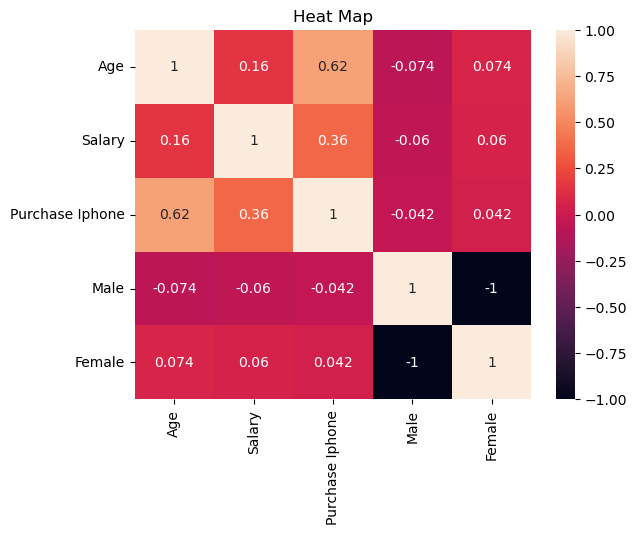

In [11]:
cor = data[['Age', 'Salary', 'Purchase Iphone', 'Male', 'Female']].corr()
sns.heatmap(cor, annot=True)
plt.title('Heat Map')
plt.savefig('Iphone_Heatmap.png')
plt.show()

In [ ]:
## Age and salary are more correlated.

Text(0.5, 1.0, 'Boxplot of Purchase_Iphone vs Age')

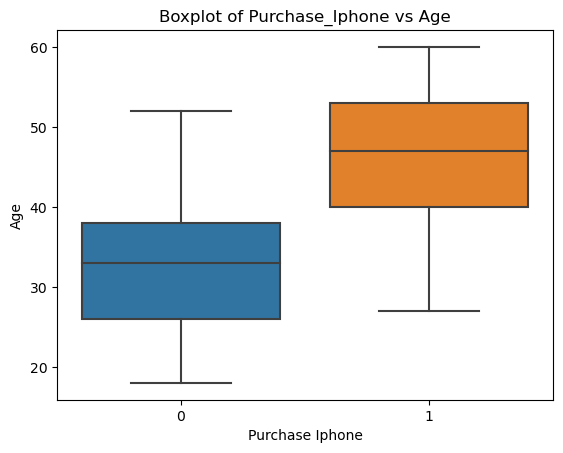

In [34]:
sns.boxplot(x='Purchase Iphone',y='Age',data = data)
plt.savefig('iphone_graph_1.png')
plt.title("Boxplot of Purchase_Iphone vs Age")

In [27]:
#Since we have a outliner in Age column,We have to impute them
q1 = data[(data['Purchase Iphone'] == 0)]['Age'].quantile(0.25)
print('*********************************')
print(f'The Q1 value is:{q1}.')
q3 = data[(data['Purchase Iphone'] == 0)]['Age'].quantile(0.75)
print(f'The Q3 value is:{q3}.')
iqr = q3-q1
print(f'The IQR value is {iqr}.')
print('*********************************')
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
print(f'The upper threshold value is {upper}')
print(f'The lower threshold value is {lower}')
print('*********************************')


outliers = data[(data['Purchase Iphone']==0)& (data['Age']> upper)]
print(outliers)
data.loc[outliers.index, 'Purchase Iphone'] = 1

*********************************
The Q1 value is:26.0.
The Q3 value is:38.0.
The IQR value is 12.0.
*********************************
The upper threshold value is 56.0
The lower threshold value is 8.0
*********************************
     Gender  Age  Salary  Purchase Iphone  Female  Male
64   Female   59   83000                0       1     0
212  Female   59   42000                0       1     0


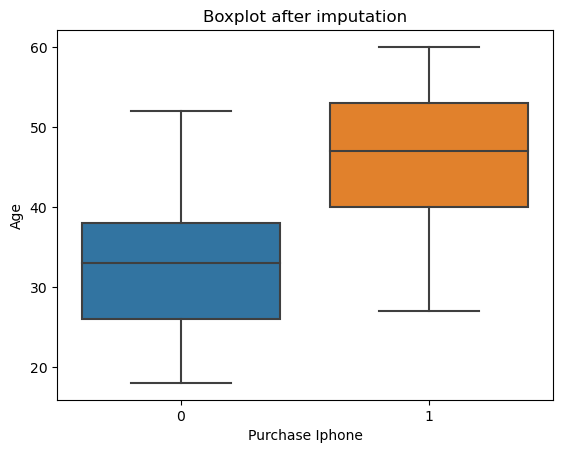

In [35]:
# After imputation Boxplot
sns.boxplot(x='Purchase Iphone',y='Age',data=data)
plt.title('Boxplot after imputation')
plt.savefig('iphone_graph_2.png')

Text(0.5, 1.0, 'Boxplot of Purchae Iphone vs Salary ')

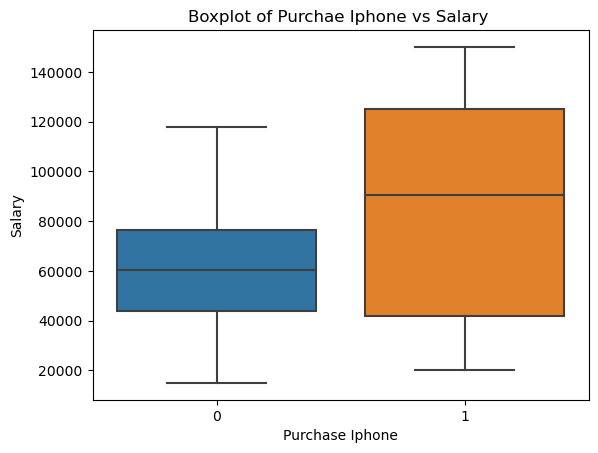

In [37]:
sns.boxplot(x='Purchase Iphone',y='Salary',data=data)
plt.savefig('iphone_graph_3.png')
plt.title('Boxplot of Purchae Iphone vs Salary ')

In [31]:
q1 = data[(data['Purchase Iphone'] == 0)]['Salary'].quantile(0.25)
print('*********************************')
print(f'The Q1 value is:{q1}.')
q3 = data[(data['Purchase Iphone'] == 0)]['Salary'].quantile(0.75)
print(f'The Q3 value is:{q3}.')
iqr = q3-q1
print(f'The IQR value is {iqr}.')
print('*********************************')
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
print(f'The upper threshold value is {upper}')
print(f'The lower threshold value is {lower}')
print('*********************************')


outliers = data[(data['Purchase Iphone']==0)& (data['Salary']> upper)]
print(outliers)
data.loc[outliers.index, 'Purchase Iphone'] = 1

*********************************
The Q1 value is:44000.0.
The Q3 value is:77000.0.
The IQR value is 33000.0.
*********************************
The upper threshold value is 126500.0
The lower threshold value is -5500.0
*********************************
     Gender  Age  Salary  Purchase Iphone  Female  Male
270  Female   43  133000                0       1     0
284    Male   48  141000                0       0     1
306  Female   51  134000                0       1     0


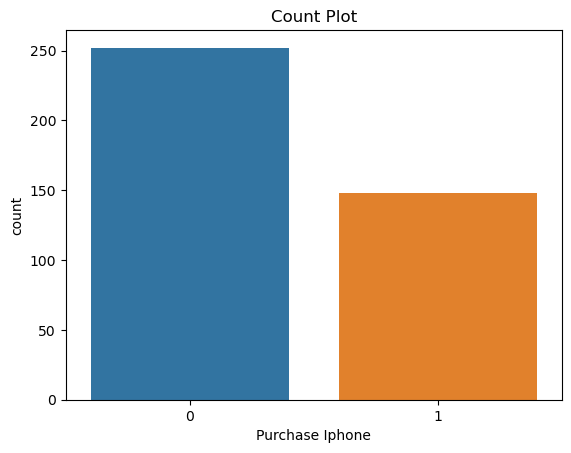

In [38]:
sns.countplot(x= 'Purchase Iphone', data = data)
plt.title('Count Plot')
plt.savefig('iphone_graph_4')
plt.show()


### Model planning

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [44]:
X = data[['Age', 'Salary', 'Male', 'Female']]

In [45]:
y = data['Purchase Iphone']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=1335)

In [48]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 4), (80, 4), (320,), (80,))

In [51]:
# We are using error method to find the appropiate k-value
error = []
for i in range(1,31):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    predict_i = clf.predict(X_test)
    error.append(1 - accuracy_score(predict_i, y_test))

In [52]:
error

[0.16249999999999998,
 0.13749999999999996,
 0.13749999999999996,
 0.16249999999999998,
 0.11250000000000004,
 0.13749999999999996,
 0.13749999999999996,
 0.15000000000000002,
 0.15000000000000002,
 0.17500000000000004,
 0.15000000000000002,
 0.15000000000000002,
 0.16249999999999998,
 0.16249999999999998,
 0.17500000000000004,
 0.16249999999999998,
 0.17500000000000004,
 0.17500000000000004,
 0.17500000000000004,
 0.1875,
 0.16249999999999998,
 0.1875,
 0.17500000000000004,
 0.17500000000000004,
 0.16249999999999998,
 0.17500000000000004,
 0.17500000000000004,
 0.16249999999999998,
 0.16249999999999998,
 0.16249999999999998]

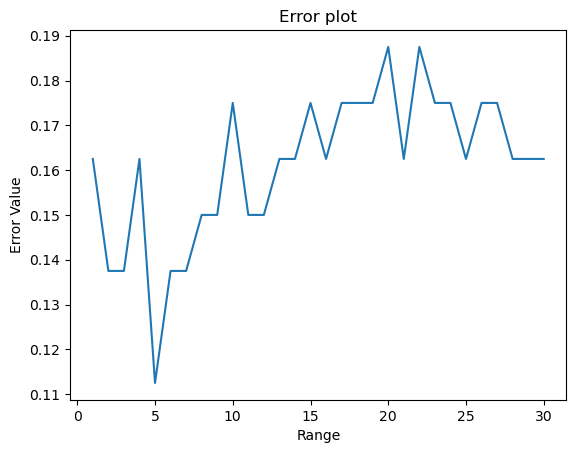

In [53]:
plt.plot(range(1,31), error)
plt.xlabel('Range')
plt.ylabel('Error Value')
plt.title('Error plot')
plt.savefig('iphone_graph_5.png')
plt.show()


In [77]:
knn = KNeighborsClassifier(n_neighbors=5)

In [78]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [79]:
pred = knn.predict(X_test)
pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [80]:
y_test

174    0
295    0
329    1
119    0
68     0
      ..
353    0
181    0
383    1
394    0
118    0
Name: Purchase Iphone, Length: 80, dtype: int64

In [81]:
acc = accuracy_score(pred, y_test)
print(f'The Accuracy score of this model using KNN Classifier is {acc}')

The Accuracy score of this model using KNN Classifier is 0.8875


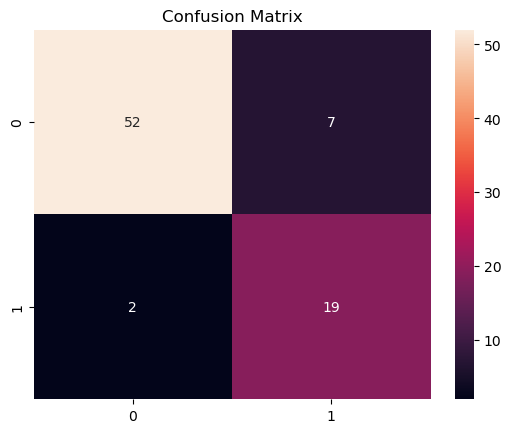

In [82]:
sns.heatmap(confusion_matrix(pred, y_test), annot=True)
plt.title('Confusion Matrix')
plt.savefig('iphone_confusion_matrix.png')
plt.show()


In [ ]:
# Out of 80 it predicted 71 correctly and 9 wrongly, with the accuracy score of 88%